### CS329E Term Project

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

Cleaning and preparing data

In [129]:
# Load Dataset with column names

column_names = [
    'ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', ' concavity1', 'concave_points1','symmetry1', 'fractal_dimension_1',
    'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', ' concavity2', 'concave_points2','symmetry2', 'fractal_dimension_2',
    'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', ' concavity3', 'concave_points3','symmetry3', 'fractal_dimension_3']
df = pd.read_csv('wdbc.csv', names=column_names, header=None)
df = df.drop('ID', axis=1)
df

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension_3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [130]:
# In diagnosis (target) column, display 1 if malignant and 0 if benign
df.loc[df['Diagnosis'] == 'B', 'Diagnosis'] = 0
df.loc[df['Diagnosis'] == 'M', 'Diagnosis'] = 1
df['Diagnosis'] = df['Diagnosis'].astype(int)

X = df.drop('Diagnosis', axis=1)        # Features
y = df['Diagnosis']                     # Target

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model 
### Using Accuracy, Confusion Matrix, Classification Report, and ROC & AUC

Accuracy: 0.9824561403508771

[[106   2]
 [  1  62]]

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



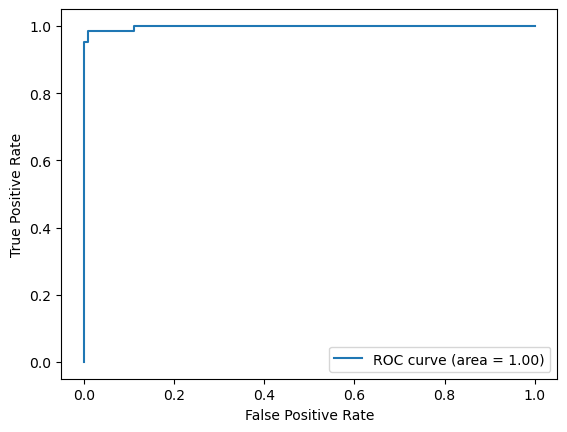

In [132]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building Logistic Regression Model with scaled data
logRegModel = LogisticRegression(max_iter=1000, random_state=42)
logRegModel.fit(X_train_scaled, y_train)

# Determing Accuracy of model using accuracy_score
y_pred = logRegModel.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

# Displaying the classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Displaying the ROC curve and AUC
y_prob = logRegModel.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Random Forest Classifier

Accuracy: 0.9707602339181286

[[107   1]
 [  4  59]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



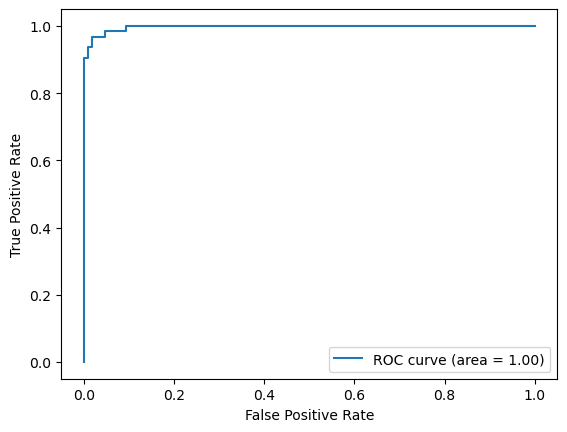

In [133]:
rfModel = RandomForestClassifier(n_estimators=100, random_state=42)
rfModel.fit(X_train_scaled,  y_train)

y_pred = rfModel.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

print(classification_report(y_test, y_pred, zero_division=0))

y_prob = rfModel.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# AdaBoostClassifier